# Logistic Regression

Perform logistic regression on real world dataset

**Lecture section: TC1L**

**Tutorial section: TT2L**

| | Student ID     | Student Name                        
|--:|:-------------|:------------------------------------
| 1 | 1211101888   | SHAHNAZ BINTI HUSAIN SUKRI          
| 2 | 1221303909   | MUHAMMAD UKASYAH BIN MD YUSOF           

In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [20]:
# load dataset
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
# Data pre-processing
# Dropping NaN values
df = df.dropna()

print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [22]:
# split dataset in features and target variable
feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

X = df[feature_cols]  # Features
y = df['TenYearCHD']  #  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 16)

In [24]:
# instantiate the model (using the default parameters)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 16, max_iter = 1600)
model.fit(X_train, y_train)

# Test using test set
y_pred = model.predict(X_test)

#Observing prediction value against real value
some_data = X_test[:5]    # take first 5 entries from X_test
predicted_value = model.predict(some_data)
print(predicted_value)

actual_value = y_test.iloc[:5].values     # take first 5 entries from y_test, which are the true values
print(actual_value)

[0 0 0 0 0]
[1 1 0 0 0]


In [29]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix,
                          figure_size = (3, 3),
                          title_font_size = 15,
                          font_size = 12):

  num_classes = confusion_matrix.shape[0]
  fig, ax = plt.subplots(figsize = figure_size)

  # class_names=[0,1] # name of classes
  # tick_marks = np.arange(len(class_names))
  class_names = np.arange(num_classes) # name of classes
  tick_marks  = np.arange(num_classes)

  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(confusion_matrix),
              annot = True, cmap = "YlGnBu", fmt = 'g')

  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y = 1.1, fontsize = title_font_size)
  plt.ylabel('Actual Labels', fontsize = font_size)
  plt.xlabel('Predicted Labels', fontsize = font_size)

[[765   9]
 [129  11]]


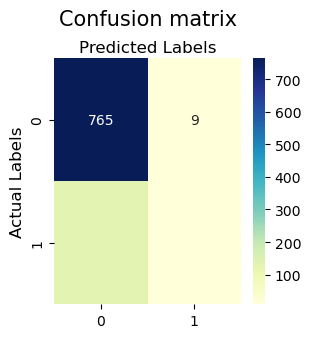

In [25]:
# Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [26]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       774
           1       0.55      0.08      0.14       140

    accuracy                           0.85       914
   macro avg       0.70      0.53      0.53       914
weighted avg       0.81      0.85      0.80       914



In [27]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.849015317286652


- Model Strength: The model has a high accuracy, mainly due to its ability to correctly classify negative instances.
- Model Weakness: The model performs poorly in identifying positive instances (low recall and F1 score). This could be due to class imbalance or insufficient features that distinguish between the positive and negative classes.

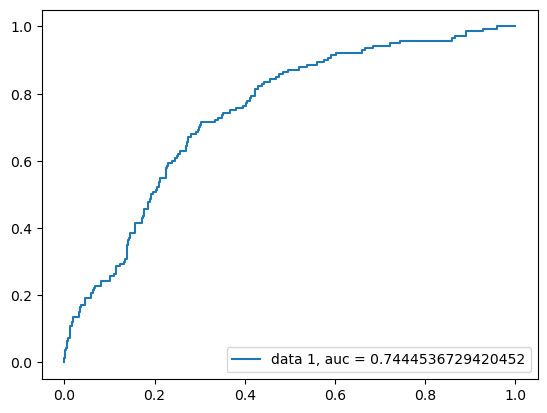

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc = " + str(auc))

plt.legend(loc = 4)

plt.show()

The AUC of 0.7444 indicates a reasonably good model performance. It shows that the model is capable of distinguishing between the positive and negative classes better than random guessing (AUC = 0.5).

### References

**Dataset Source:** [Heart Disease](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression)